In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./data/최종_이상치처리후_train.csv",encoding='utf-8-sig',index_col=0)
df.head()

,거래소코드,회계년도,총자산경상이익률,총자산순이익률,금융비용/매출액,금융비용/총부채,순금융비용/매출액,매출액경상이익률,매출액순이익률,자기자본경상이익률,...,이익잉여금/총부채,이익잉여금/유동자산,현금비율,당좌비율,유동비율,유동부채회전율,총자산,매출액,고정자산,부실여부
회사명,,,,,,,,,,,,,,,,,,,,,
(주)CMG제약_58820,58820,2013-12-01,1.40,0.52,0.0165,0.020759,0.016518,3.88,1.45,1.96,...,-3.219166,-1.366187,394.63,610.74,694.71,3.709455,5.651050e+10,2.040200e+10,1.770300e+10,0.0
(주)CMG제약_58820,58820,2014-12-01,0.78,0.28,-0.0065,-0.018509,-0.006461,1.94,0.69,0.90,...,-4.417773,-1.851313,101.24,268.23,324.58,2.609588,5.699050e+10,2.275300e+10,2.976700e+10,0.0
(주)CMG제약_58820,58820,2015-12-01,-4.49,-6.37,-0.0011,-0.003166,-0.001109,-9.51,-13.50,-5.37,...,-4.417773,-2.147305,29.00,235.21,296.85,3.055593,5.730050e+10,2.704200e+10,3.026100e+10,0.0
(주)CMG제약_58820,58820,2016-12-01,2.07,2.06,-0.0047,-0.015814,-0.004671,5.25,5.24,2.34,...,-4.417773,-7430.500000,23.52,792.17,862.15,3.608405,8.375650e+10,3.297000e+10,3.220800e+10,0.0
(주)CMG제약_58820,58820,2017-12-01,1.41,2.57,-0.0272,-0.105115,-0.027181,3.75,6.83,1.57,...,-0.316152,-7430.500000,34.90,673.66,746.28,3.816244,1.102740e+11,4.153600e+10,2.834100e+10,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136846 entries, (주)CMG제약_58820 to （주）신미코스메틱_85105
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   거래소코드        136846 non-null  int64  
 1   회계년도         136846 non-null  object 
 2   총자산경상이익률     136846 non-null  float64
 3   총자산순이익률      136846 non-null  float64
 4   금융비용/매출액     136846 non-null  float64
 5   금융비용/총부채     136846 non-null  float64
 6   순금융비용/매출액    136846 non-null  float64
 7   매출액경상이익률     136846 non-null  float64
 8   매출액순이익률      136846 non-null  float64
 9   자기자본경상이익률    136846 non-null  float64
 10  자기자본순이익률     136846 non-null  float64
 11  EBITDA/이자비용  136846 non-null  float64
 12  EBIT/이자비용    136846 non-null  float64
 13  영업현금흐름/이자비용  136846 non-null  float64
 14  잉여현금흐름/총자산   136846 non-null  float64
 15  잉여현금흐름/총부채   136846 non-null  float64
 16  잉여현금흐름/이자비용  136846 non-null  float64
 17  부채상환계수       136846 non-null  float64
 18  자기자본비율 

In [4]:
df["회계년도"] = pd.to_datetime(df["회계년도"])
df["회계년"] = df["회계년도"].dt.year

In [5]:
# train = df[df["회계년"] <= 2020].reset_index(drop='index')
# test  = df[df["회계년"] > 2020].reset_index(drop='index')
train = df.reset_index(drop='index')
train.columns

Index(['거래소코드', '회계년도', '총자산경상이익률', '총자산순이익률', '금융비용/매출액', '금융비용/총부채',
       '순금융비용/매출액', '매출액경상이익률', '매출액순이익률', '자기자본경상이익률', '자기자본순이익률',
       'EBITDA/이자비용', 'EBIT/이자비용', '영업현금흐름/이자비용', '잉여현금흐름/총자산', '잉여현금흐름/총부채',
       '잉여현금흐름/이자비용', '부채상환계수', '자기자본비율', '유동자산/총자산', '이익잉여금/총자산', '이익잉여금/총부채',
       '이익잉여금/유동자산', '현금비율', '당좌비율', '유동비율', '유동부채회전율', '총자산', '매출액', '고정자산',
       '부실여부', '회계년'],
      dtype='object')

In [6]:
col = df.columns[2:30]
train_1 = train[col]
# test_1 = test[col]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_1)

train_Min = scaler.transform(train_1)
# test_Min = scaler.transform(test_1)
train_Min = pd.DataFrame(train_Min,columns = train_1.columns)

In [8]:
train_Min

,총자산경상이익률,총자산순이익률,금융비용/매출액,금융비용/총부채,순금융비용/매출액,매출액경상이익률,매출액순이익률,자기자본경상이익률,자기자본순이익률,EBITDA/이자비용,...,이익잉여금/총자산,이익잉여금/총부채,이익잉여금/유동자산,현금비율,당좌비율,유동비율,유동부채회전율,총자산,매출액,고정자산
0,0.345868,0.497460,0.557132,0.851214,0.439224,0.819517,0.641846,0.409614,0.569622,0.036589,...,0.057499,0.035028,0.997686,0.397333,0.153165,0.160419,0.157921,0.022740,0.009633,0.011352
1,0.337169,0.494334,0.548069,0.772399,0.427996,0.815613,0.641251,0.406421,0.568260,0.036604,...,0.059574,0.000000,0.997621,0.104523,0.067268,0.074950,0.111097,0.022934,0.010743,0.019088
2,0.263224,0.407711,0.550197,0.803194,0.430610,0.792570,0.630148,0.387537,0.542512,0.036417,...,0.028915,0.000000,0.997581,0.032426,0.058987,0.068547,0.130085,0.023060,0.012768,0.019405
3,0.355269,0.517520,0.548779,0.777808,0.428870,0.822275,0.644812,0.410758,0.574810,1.000000,...,0.185672,0.000000,0.000000,0.026957,0.198665,0.199083,0.153619,0.033745,0.015567,0.020653
4,0.346008,0.524163,0.539913,0.598572,0.417871,0.819256,0.646056,0.408439,0.576464,1.000000,...,0.477503,0.119866,0.000000,0.038314,0.168944,0.172327,0.162468,0.044456,0.019611,0.018174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136841,0.414620,0.561287,0.549724,0.776045,0.430040,0.816921,0.642449,0.432263,0.593651,1.000000,...,0.487278,0.128231,0.000000,0.052726,0.037813,0.063672,0.286448,0.014771,0.042300,0.001652
136842,0.451242,0.589032,0.550079,0.789926,0.430455,0.819457,0.643262,0.443829,0.603833,1.000000,...,0.517302,0.133847,0.000000,0.076499,0.042418,0.068637,0.317532,0.016042,0.043644,0.002387
136843,0.434545,0.572489,0.550118,0.793745,0.430509,0.819417,0.643145,0.438558,0.597737,0.036585,...,0.540572,0.138168,0.997886,0.106858,0.049327,0.068510,0.292375,0.017554,0.041584,0.005600
136844,0.422759,0.565195,0.550355,0.803602,0.430823,0.819860,0.643348,0.438257,0.598158,0.036585,...,0.558793,0.139462,0.997893,0.072367,0.034551,0.052355,0.202321,0.020772,0.041346,0.009436


In [9]:
train[col] = train_Min
# test[col] = test_Min

In [10]:
# 1-1 정규성 테스트(샤피로)
from scipy.stats import norm
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import kstest

for j in col:
    a = stats.shapiro(train_Min[j])
    p = a.pvalue
    print(j,a)

c:\Users\ktwjj\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


총자산경상이익률 ShapiroResult(statistic=0.9017041325569153, pvalue=0.0)
총자산순이익률 ShapiroResult(statistic=0.8834558725357056, pvalue=0.0)
금융비용/매출액 ShapiroResult(statistic=0.4513959288597107, pvalue=0.0)
금융비용/총부채 ShapiroResult(statistic=0.5805455446243286, pvalue=0.0)
순금융비용/매출액 ShapiroResult(statistic=0.47102248668670654, pvalue=0.0)
매출액경상이익률 ShapiroResult(statistic=0.41307616233825684, pvalue=0.0)
매출액순이익률 ShapiroResult(statistic=0.30977970361709595, pvalue=0.0)
자기자본경상이익률 ShapiroResult(statistic=0.7771726250648499, pvalue=0.0)
자기자본순이익률 ShapiroResult(statistic=0.7451024055480957, pvalue=0.0)
EBITDA/이자비용 ShapiroResult(statistic=0.38236039876937866, pvalue=0.0)
EBIT/이자비용 ShapiroResult(statistic=0.3823012113571167, pvalue=0.0)
영업현금흐름/이자비용 ShapiroResult(statistic=0.3826361298561096, pvalue=0.0)
잉여현금흐름/총자산 ShapiroResult(statistic=0.3122301697731018, pvalue=0.0)
잉여현금흐름/총부채 ShapiroResult(statistic=0.2600311040878296, pvalue=0.0)
잉여현금흐름/이자비용 ShapiroResult(statistic=0.3824685215950012, pvalue=0.0)
부채상환계수 

In [11]:
# 1-2 정규성 테스트(K-S)
for j in col:
    a = kstest(train_Min[j],'norm')
    p = a.pvalue
    print(j,a)

총자산경상이익률 KstestResult(statistic=0.5402924614535405, pvalue=0.0, statistic_location=0.1998035639118844, statistic_sign=-1)
총자산순이익률 KstestResult(statistic=0.5897314565736507, pvalue=0.0, statistic_location=0.3371108505926794, statistic_sign=-1)
금융비용/매출액 KstestResult(statistic=0.6733962530338785, pvalue=0.0, statistic_location=0.5111505122143419, statistic_sign=-1)
금융비용/총부채 KstestResult(statistic=0.6936311897863185, pvalue=0.0, statistic_location=0.6572315318655526, statistic_sign=-1)
순금융비용/매출액 KstestResult(statistic=0.6322615478159836, pvalue=0.0, statistic_location=0.39549221401014767, statistic_sign=-1)
매출액경상이익률 KstestResult(statistic=0.7298442814458941, pvalue=0.0, statistic_location=0.7325766266175611, statistic_sign=-1)
매출액순이익률 KstestResult(statistic=0.6913894289454943, pvalue=0.0, statistic_location=0.5804283355634327, statistic_sign=-1)
자기자본경상이익률 KstestResult(statistic=0.5828571983710049, pvalue=0.0, statistic_location=0.3065779169929522, statistic_sign=-1)
자기자본순이익률 KstestResult(s

In [12]:
train = train.reset_index(drop=True)
train_Min["부실여부"] = train["부실여부"]

In [13]:
# 부도기업과 정상기업의 피처별 등분산비교 (정규성 가정으로 bartlett)
Bad = train_Min[train_Min['부실여부']== 1] #Existing Customer
Good = train_Min[train_Min['부실여부']== 0] #Attrited Customer

c = []
for i in train_Min:
    # lresult = stats.levene(close[i], normal[i])
    lresult = stats.bartlett(Bad[i], Good[i])
    c.append([i,lresult[-1]])

c= pd.DataFrame(c)
c.columns=["피처값",'F-test']
c

c:\Users\ktwjj\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:2901: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
c:\Users\ktwjj\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:2901: RuntimeWarning: invalid value encountered in scalar subtract
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


,피처값,F-test
0,총자산경상이익률,9.623195e-67
1,총자산순이익률,8.650445e-18
2,금융비용/매출액,1.095247e-275
3,금융비용/총부채,6.966404e-222
4,순금융비용/매출액,7.319644e-271
5,매출액경상이익률,4.512629e-52
6,매출액순이익률,3.209472e-83
7,자기자본경상이익률,2.029163e-251
8,자기자본순이익률,2.347408e-276
9,EBITDA/이자비용,2.085884e-189


In [14]:
# F-test 결과 0.05 이상이면 homo 0.05 이하이면 hetero
c["분산"] =''
c["T-test"] =""
for i in c.index:
    if c.loc[i,"F-test"]>=0.05:
        c.loc[i,"분산"] = "homo"
    else:
        c.loc[i,"분산"] = "hetero"
c

,피처값,F-test,분산,T-test
0,총자산경상이익률,9.623195e-67,hetero,
1,총자산순이익률,8.650445e-18,hetero,
2,금융비용/매출액,1.095247e-275,hetero,
3,금융비용/총부채,6.966404e-222,hetero,
4,순금융비용/매출액,7.319644e-271,hetero,
5,매출액경상이익률,4.512629e-52,hetero,
6,매출액순이익률,3.209472e-83,hetero,
7,자기자본경상이익률,2.029163e-251,hetero,
8,자기자본순이익률,2.347408e-276,hetero,
9,EBITDA/이자비용,2.085884e-189,hetero,


In [15]:
# homo 인 feature 는 student t-test, hetero이면 Welchs T-Test 진행
c["분산"] =''
c["T-test"] =""
for i in c.index:
    if c.loc[i,"F-test"]>=0.05:
        c.loc[i,"분산"] = "homo"
        result = stats.ttest_ind(Bad[c.loc[i,"피처값"]], Good[c.loc[i,"피처값"]], equal_var=True)       ## equal_var = True Student T-test
        c.loc[i,"T-test"] = result[-1]
        print(Bad[c.loc[i,"피처값"]])
    else:
        c.loc[i,"분산"] = "hetero"
        result = stats.ttest_ind(Bad[c.loc[i,"피처값"]], Good[c.loc[i,"피처값"]], equal_var=False)      ## equal_var = False Welchs T-Test
        c.loc[i,"T-test"] = result[-1]
c

108       0.131268
716       0.038446
1294      0.154180
1756      0.360761
2021      0.278005
            ...   
136595    0.056788
136695    0.481910
136704    0.153749
136767    0.046933
136777    0.504197
Name: 유동부채회전율, Length: 5538, dtype: float64


c:\Users\ktwjj\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,피처값,F-test,분산,T-test
0,총자산경상이익률,9.623195e-67,hetero,0.0
1,총자산순이익률,8.650445e-18,hetero,0.0
2,금융비용/매출액,1.095247e-275,hetero,0.0
3,금융비용/총부채,6.966404e-222,hetero,0.0
4,순금융비용/매출액,7.319644e-271,hetero,0.0
5,매출액경상이익률,4.512629e-52,hetero,0.001189
6,매출액순이익률,3.209472e-83,hetero,0.056945
7,자기자본경상이익률,2.029163e-251,hetero,0.0
8,자기자본순이익률,2.347408e-276,hetero,0.0
9,EBITDA/이자비용,2.085884e-189,hetero,0.0


In [16]:
# 0.05 이상이면 유의미하지 않으므로 0.05 이하인 것만 추출
d = c[c["T-test"]<= 0.05]
d.sort_values('T-test',ascending=False)["피처값"].unique()
# d.sort_values('T-test',ascending=False)["피처값"]

array(['매출액경상이익률', '총자산순이익률', '자기자본순이익률', '금융비용/매출액', '이익잉여금/총자산',
       '유동자산/총자산', '순금융비용/매출액', '총자산경상이익률', '자기자본경상이익률', '유동비율', '현금비율',
       '당좌비율', '이익잉여금/총부채', '부채상환계수', '이익잉여금/유동자산', 'EBIT/이자비용',
       'EBITDA/이자비용', '영업현금흐름/이자비용', '잉여현금흐름/이자비용', '금융비용/총부채', '자기자본비율',
       '잉여현금흐름/총부채', '잉여현금흐름/총자산', '총자산', '매출액', '고정자산', '부실여부'],
      dtype=object)

In [17]:
d.sort_values('T-test',ascending=False).dropna()

,피처값,F-test,분산,T-test
5,매출액경상이익률,4.512629e-52,hetero,0.001189
1,총자산순이익률,8.650445e-18,hetero,0.0
8,자기자본순이익률,2.347408e-276,hetero,0.0
2,금융비용/매출액,1.095247e-275,hetero,0.0
18,이익잉여금/총자산,4.358833e-09,hetero,0.0
17,유동자산/총자산,1.596627e-10,hetero,0.0
4,순금융비용/매출액,7.319644e-271,hetero,0.0
0,총자산경상이익률,9.623195e-67,hetero,0.0
7,자기자본경상이익률,2.029163e-251,hetero,0.0
23,유동비율,9.767154e-149,hetero,0.0


In [18]:

fea = train[['총자산경상이익률', '총자산순이익률', '금융비용/매출액', '금융비용/총부채', '매출액경상이익률', '자기자본경상이익률', '자기자본순이익률','잉여현금흐름/총자산', '잉여현금흐름/총부채',
       '잉여현금흐름/이자비용', '부채상환계수', '자기자본비율', '유동자산/총자산', '이익잉여금/총자산', '이익잉여금/총부채', '현금비율', '당좌비율', '유동비율', '유동부채회전율', '총자산', '매출액', '고정자산']]

In [19]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 
                    
    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    # Reset the index
    vif = vif.reset_index().drop(columns='index')

    # Convert VIF Factor to a more readable format
    vif["VIF Factor"] = vif["VIF Factor"].apply(lambda x: '{:.2f}'.format(x))
    return vif

vif(fea)

,VIF Factor,features
0,142.00,자기자본순이익률
1,134.58,총자산순이익률
2,90.04,금융비용/총부채
3,84.56,매출액경상이익률
4,72.39,자기자본경상이익률
5,71.41,금융비용/매출액
6,58.98,총자산경상이익률
7,43.68,이익잉여금/총자산
8,41.19,잉여현금흐름/총자산
9,30.96,유동비율


c:\Users\ktwjj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\ktwjj\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\ktwjj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


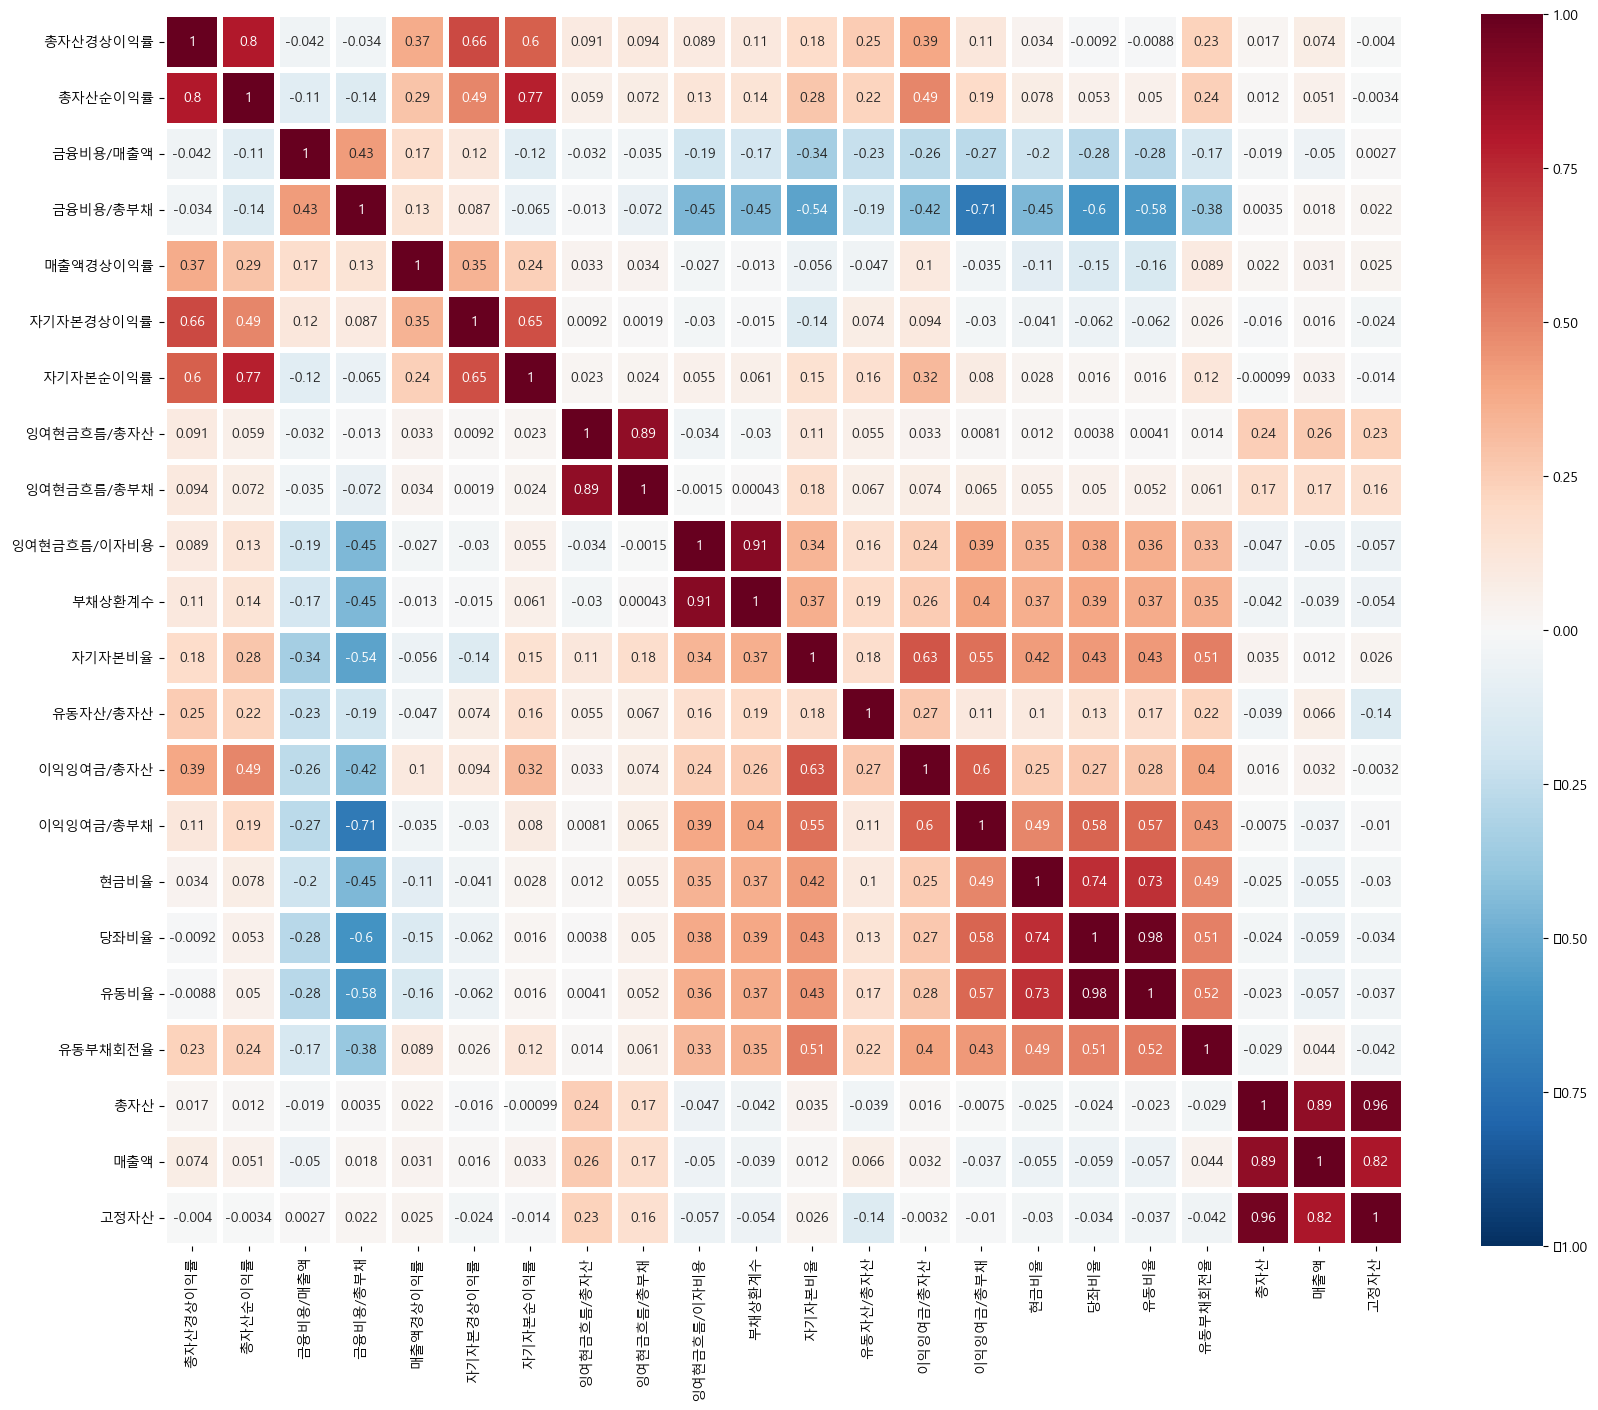

In [23]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
plt.rc('font', family = 'Malgun Gothic')
def plot_cor(df):

    df_ = df.select_dtypes(include=[np.number])
    df_cor = df_.corr(method='pearson')
    plt.figure(figsize = (20,16))

    sns.heatmap(df_cor, 
                xticklabels = df_cor.columns, 
                yticklabels = df_cor.columns, 
                cmap = 'RdBu_r', 
                annot = True,
                annot_kws = {'size':10}, 
                linewidth = 3,
                vmin=-1, vmax=1)
plot_cor(fea)

# 2.logit

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
import numpy as np
lr_clf = LogisticRegression()

feature = train_Min.drop('부실여부',axis=1)
target = train['부실여부']

logit = SelectFromModel(LogisticRegression(),threshold='0.12*mean')
logit.fit(feature, target)
logit_support = logit.get_support()
lr_feature = feature.loc[:,logit_support].columns.tolist()

c:\Users\ktwjj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
len(lr_feature)

22

# 3.LASSO

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [42]:
# 12개 피처로 조정 C 값 조정
lasso = SelectFromModel(LogisticRegression(C=0.2, penalty='l1',solver='liblinear'))
lasso.fit(feature, target)
lasso_support = lasso.get_support()
lasso_feature = feature.loc[:,lasso_support].columns.tolist()

In [46]:
from collections import Counter
combined = list(fea.columns) + lasso_feature + lr_feature

# 각 요소의 개수를 세고, 2번 이상 등장하는 요소를 찾습니다.
counter = Counter(combined)
result = [item for item, count in counter.items() if count >= 3]

print(result)
len(result)

['총자산경상이익률', '금융비용/총부채', '매출액경상이익률', '자기자본경상이익률', '잉여현금흐름/총자산', '잉여현금흐름/이자비용', '부채상환계수', '자기자본비율', '이익잉여금/총자산', '이익잉여금/총부채', '당좌비율', '유동비율', '유동부채회전율', '총자산', '매출액']


15

In [44]:
len(list(fea.columns))

22

In [43]:
len(lasso_feature)

22

In [45]:
len(lr_feature)

22

In [62]:
fea = train[['총자산경상이익률', '금융비용/매출액', '금융비용/총부채', '매출액경상이익률', '자기자본경상이익률', '자기자본순이익률', '잉여현금흐름/총부채',
       '잉여현금흐름/이자비용', '자기자본비율', '유동자산/총자산', '이익잉여금/총자산', '이익잉여금/총부채', '현금비율', '당좌비율', '유동부채회전율', '매출액', '고정자산']]

In [63]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 
                    
    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    # Reset the index
    vif = vif.reset_index().drop(columns='index')

    # Convert VIF Factor to a more readable format
    vif["VIF Factor"] = vif["VIF Factor"].apply(lambda x: '{:.2f}'.format(x))
    return vif

vif(fea)

,VIF Factor,features
0,86.49,금융비용/총부채
1,83.60,매출액경상이익률
2,70.77,자기자본순이익률
3,70.09,금융비용/매출액
4,59.88,자기자본경상이익률
5,42.10,이익잉여금/총자산
6,30.26,총자산경상이익률
7,10.66,이익잉여금/총부채
8,10.50,자기자본비율
9,5.92,잉여현금흐름/총부채


c:\Users\ktwjj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\ktwjj\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\ktwjj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


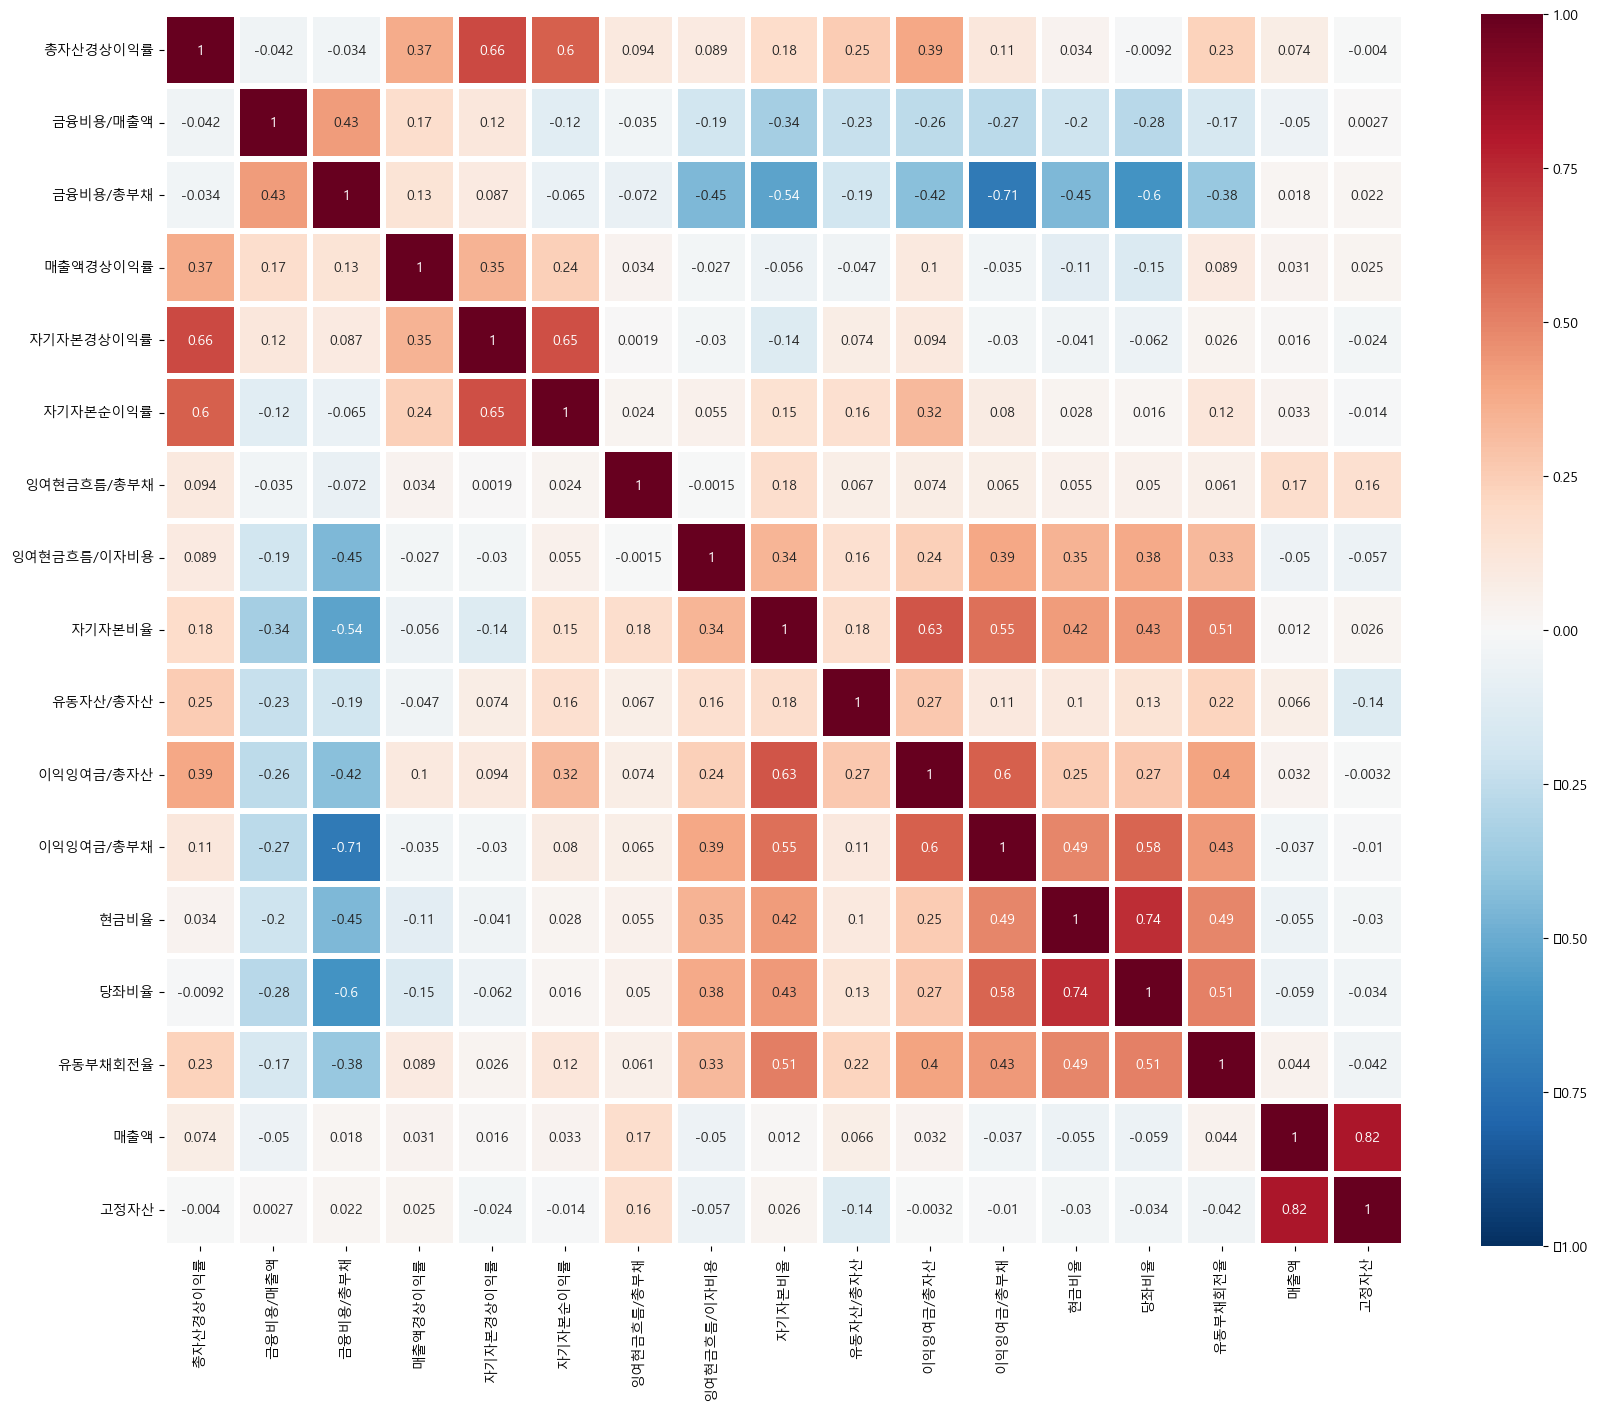

In [64]:
import seaborn as sns
def plot_cor(df):

    df_ = df.select_dtypes(include=[np.number])
    df_cor = df_.corr(method='pearson')
    plt.figure(figsize = (20,16))

    sns.heatmap(df_cor, 
                xticklabels = df_cor.columns, 
                yticklabels = df_cor.columns, 
                cmap = 'RdBu_r', 
                annot = True,
                annot_kws = {'size':10}, 
                linewidth = 3,
                vmin=-1, vmax=1)
plot_cor(fea)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
import numpy as np
lr_clf = LogisticRegression()

feature = train_Min.drop('부실여부',axis=1)
target = train['부실여부']

logit = SelectFromModel(LogisticRegression(),threshold='0.15*mean')
logit.fit(feature, target)
logit_support = logit.get_support()
lr_feature = feature.loc[:,logit_support].columns.tolist()

c:\Users\ktwjj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
len(lr_feature)

17

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [86]:
# 12개 피처로 조정 C 값 조정
lasso = SelectFromModel(LogisticRegression(C=0.099, penalty='l1',solver='liblinear'))
lasso.fit(feature, target)
lasso_support = lasso.get_support()
lasso_feature = feature.loc[:,lasso_support].columns.tolist()

In [75]:
len(list(fea.columns))

17

In [87]:
len(lasso_feature)

17

In [77]:
len(lr_feature)

17

In [89]:
from collections import Counter
combined = list(fea.columns) + lasso_feature + lr_feature

# 각 요소의 개수를 세고, 2번 이상 등장하는 요소를 찾습니다.
counter = Counter(combined)
result = [item for item, count in counter.items() if count >= 2]

print(result)
len(result)

['총자산경상이익률', '금융비용/매출액', '금융비용/총부채', '매출액경상이익률', '자기자본경상이익률', '잉여현금흐름/총부채', '잉여현금흐름/이자비용', '자기자본비율', '유동자산/총자산', '이익잉여금/총자산', '이익잉여금/총부채', '당좌비율', '유동부채회전율', '매출액', '고정자산', '순금융비용/매출액', '잉여현금흐름/총자산', '부채상환계수', '총자산']


19